In [345]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix,classification_report


%matplotlib inline
sns.set_style('whitegrid')


# loading dataset


In [296]:
df = pd.read_csv('lending_club_loan.csv')
Info = pd.read_csv('lending_club_info.csv',index_col = 'LoanStatNew')


In [142]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [144]:
Info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [145]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [146]:
#function for extrating the description of every feature
def feat_info(feat):
    
    return Info['Description'].loc[feat]

#example
feat_info('initial_list_status')

'The initial listing status of the loan. Possible values are – W, F'

In [147]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

# Exploring data

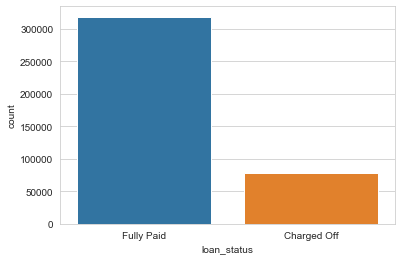

In [149]:
#show how many people have paid off their loan
sns.countplot(df['loan_status'])

In [150]:
feat_info('term')

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [151]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

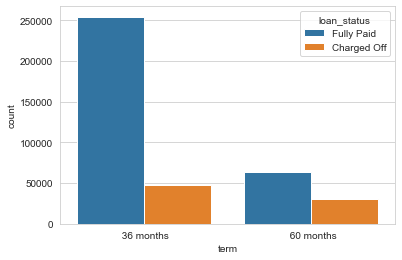

In [152]:
sns.countplot(data = df, x='term',hue='loan_status')

# above plot shows that the people who got the loan with the 60 months term are more likely not to pay off their loan peoperly

In [153]:
feat_info('grade')

'LC assigned loan grade'

In [154]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

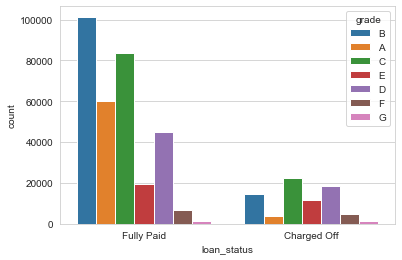

In [155]:
sns.countplot(data = df,x='loan_status',hue = 'grade')

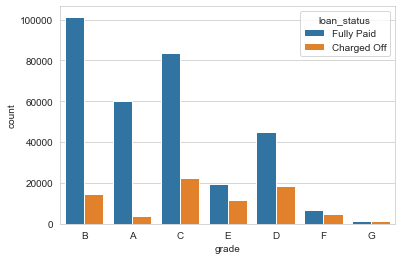

In [156]:
sns.countplot(data = df,x='grade',hue = 'loan_status')

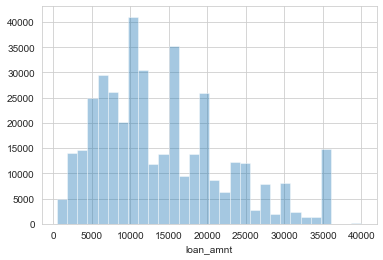

In [157]:
#histogram of The listed amount of the loan applied for by the borrower
sns.distplot(df['loan_amnt'],kde=False,bins=30)

(10, 0)

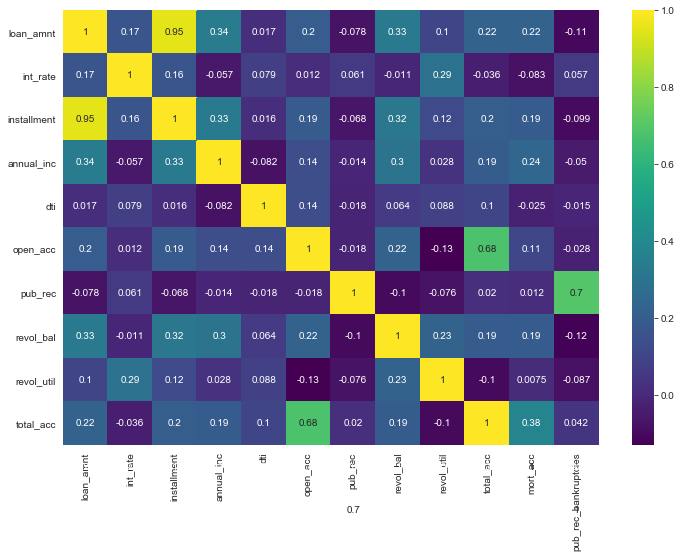

In [158]:
#how correlated are the features
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

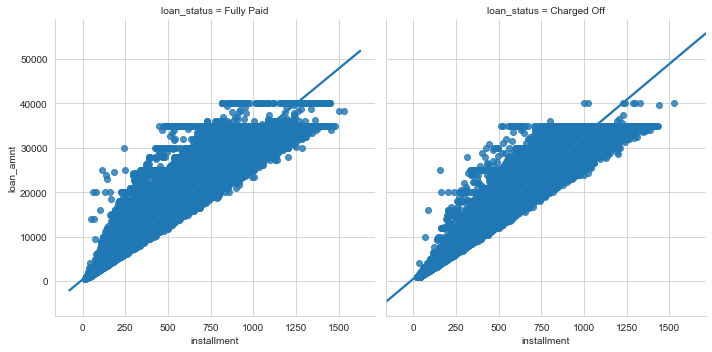

In [159]:
#correlation between installment and loan amount based on the loan sttaus
sns.lmplot(x='installment',y='loan_amnt',data=df,palette='Set1',col='loan_status')

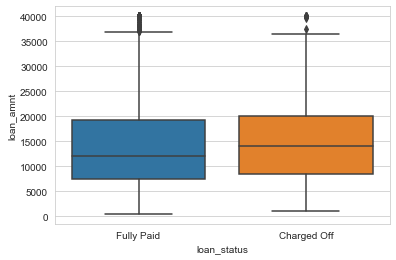

In [160]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

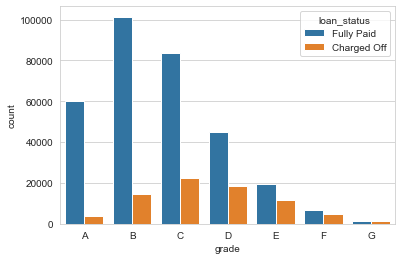

In [161]:
#how loan payoff pictured based on the grade (the plot got ordered based on the grade)
sns.countplot(data=df,x='grade',hue='loan_status',order=['A', 'B', 'C' ,'D', 'E', 'F', 'G'])

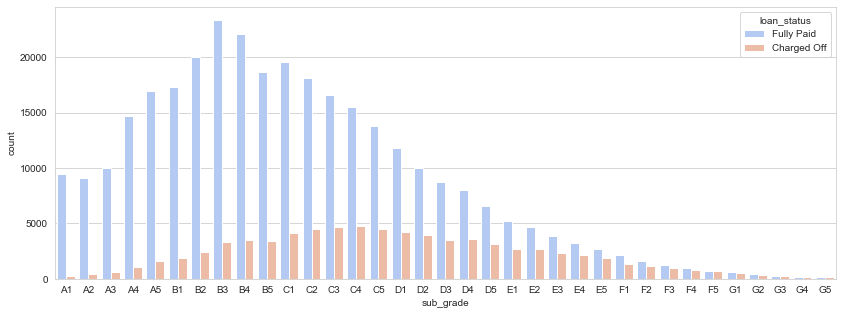

In [162]:
plt.figure(figsize=(14,5))
ordered = sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade',hue = 'loan_status' ,order=ordered,palette='coolwarm')

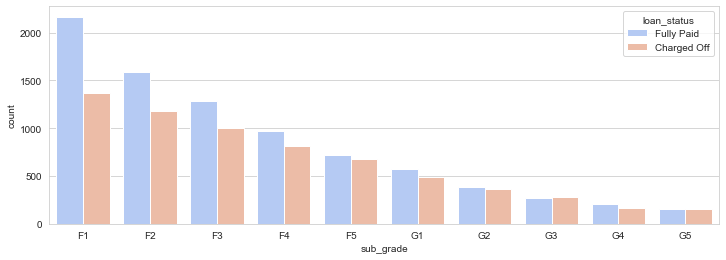

In [163]:
#zoom in to the above figure how the F and G grade distibuted
ff_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
ordered = sorted(f_and_g['sub_grade'].unique())
sns.countplot(data=f_and_g,x='sub_grade',hue = 'loan_status' ,order=ordered,palette='coolwarm')

In [297]:
#change the loan status column ('Fully paid' or 'Charged Off') to a numerical column (1 or 0)
df['loan_repaid']=df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

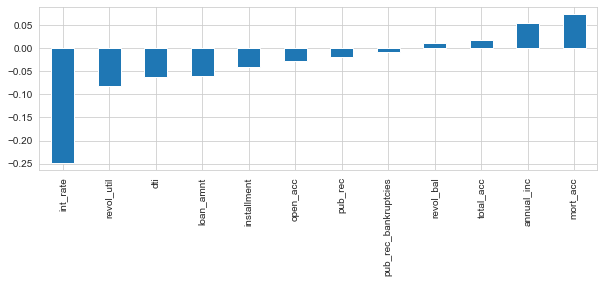

In [165]:
#show the correlation between different numerical features and the loan repaid (target)
plt.figure(figsize=(10,3))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# DATA cleaning, Pre-processing

In [166]:
print('Title:',feat_info('title'),' ,unique titles:',df['title'].nunique())
print('purpose:',feat_info('purpose'),' unique purposes:',df['purpose'].nunique())

Title: The loan title provided by the borrower  ,unique titles: 48817
purpose: A category provided by the borrower for the loan request.   unique purposes: 14


In [79]:
#note: the title does not give us necessarily good information since we have almost 50000 unique titles. It can be removed.

In [298]:
#removing the title column
df = df.drop('title',axis=1)

In [168]:
# Missing data in percent
100*(df.isnull().sum())/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [169]:
#explore imformation in 'emp_title'
df['emp_title'].nunique()

173105

In [299]:
#dropping the 'emp_title' column
df = df.drop('emp_title',axis=1)

# exploring the 'emp_length' column

In [171]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

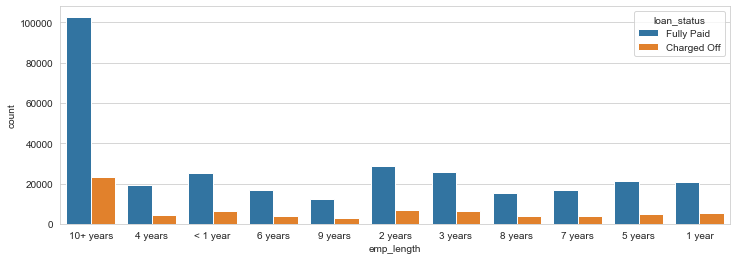

In [172]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x='emp_length',hue = 'loan_status')

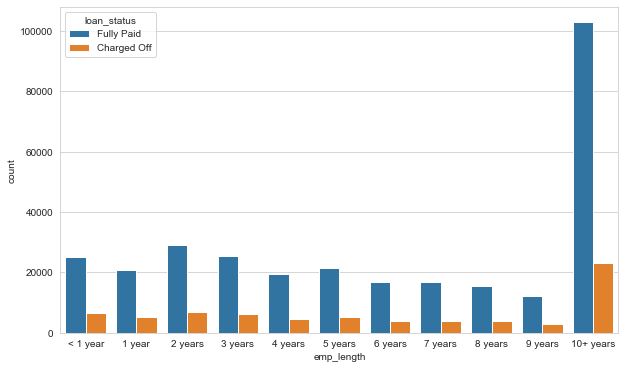

In [173]:
#plottig 'emp_length' in an aordered fashion
Ordered = ['< 1 year','1 year','2 years', '3 years', '4 years','5 years', '6 years', '7 years', '8 years', '9 years',
'10+ years']

plt.figure(figsize=(10,6))

sns.countplot(data=df,x='emp_length',order=Ordered,hue='loan_status')

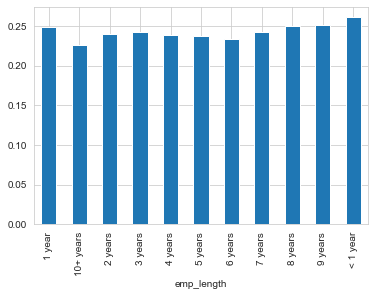

In [300]:
#The ratio of people who did not paid off their loan to the people who did in each 'emp_length' category
df_1 = df[df['loan_repaid']==1].groupby(by='emp_length').count()['loan_repaid']
df_0 = df[df['loan_repaid']==0].groupby(by='emp_length').count()['loan_repaid']

TOT = df_0/df_1
TOT.plot(kind='bar')

The result shows that there is not much difference between categories. 
Therefore, we can drop this column without losing much information 

In [301]:
df = df.drop('emp_length',axis=1)

In [302]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [178]:
feat_info('revol_util')

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [194]:
len(df[df['revol_util'].isnull()])

276

In [305]:
# fill the 'revol_util' NaN position with the average of the column  
df['revol_util'].fillna(df['revol_util'].mean(),inplace=True)

In [197]:
df.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [207]:
print('The minimum public record bankruptcies: ',df['pub_rec_bankruptcies'].min())
print('The maximum public record bankruptcies:',df['pub_rec_bankruptcies'].max())
print('The average public record bankruptcies:',df['pub_rec_bankruptcies'].mean())

The minimum public record bankruptcies:  0.0
The maximum public record bankruptcies: 8.0
The average public record bankruptcies: 0.12164755559488742


In [208]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

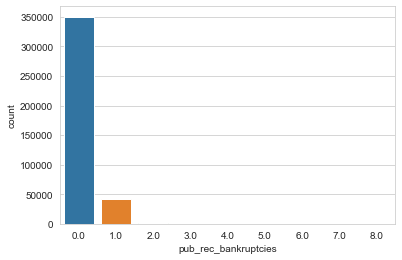

In [209]:
sns.countplot(data=df, x='pub_rec_bankruptcies')

In [303]:
#most of the entries have no public record or at most one.
# Therefore we fill the misssng data with value 1.
df['pub_rec_bankruptcies'].fillna(1,inplace=True)

In [306]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies        0
address                     0
loan_repaid                 0
dtype: int64

In [220]:
print('mort_acc:',feat_info('mort_acc'))
df['mort_acc'].value_counts()

mort_acc: Number of mortgage accounts.


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

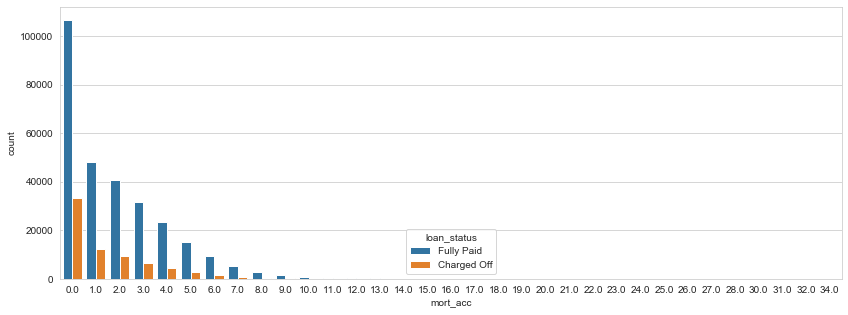

In [219]:
plt.figure(figsize=(14,5))
sns.countplot(data=df,x='mort_acc',hue='loan_status')

In [224]:
#find the most correlated column to 'mort_acc'
df.corr()['mort_acc'].drop('mort_acc').sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007510
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

In [232]:
#how the 'mort_acc' and 'total_acc' are related
df[['mort_acc','total_acc']].head()

,mort_acc,total_acc
0,0.0,25.0
1,3.0,27.0
2,0.0,26.0
3,0.0,13.0
4,1.0,43.0


In [233]:
#average of 'mort_acc' for each 'total_acc' value
total_acc_ave = df.groupby(by='total_acc').mean()['mort_acc']
total_acc_ave

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
7.0      0.221695
8.0      0.308422
9.0      0.365499
10.0     0.429158
11.0     0.526570
12.0     0.618034
13.0     0.722124
14.0     0.803482
15.0     0.940142
16.0     1.007405
17.0     1.151269
18.0     1.235885
19.0     1.358013
20.0     1.409380
21.0     1.519932
22.0     1.640736
23.0     1.721794
24.0     1.845867
25.0     1.900506
26.0     1.987414
27.0     2.103573
28.0     2.163050
29.0     2.231043
30.0     2.331386
31.0     2.390104
           ...   
90.0     2.000000
91.0     3.333333
92.0     5.000000
93.0     2.111111
94.0     2.909091
95.0     1.800000
96.0     3.000000
97.0     4.500000
98.0     0.500000
99.0     4.200000
100.0    4.000000
101.0    2.500000
102.0    3.500000
103.0    0.000000
104.0    8.000000
105.0    3.666667
106.0    1.500000
107.0    3.000000
108.0    0.000000
110.0    3.000000
111.0    2.000000
115.0    8.000000
116.0    4.500000
117.0    0.000000


In [307]:
#write a function for filling the 'mort_acc' NaN vales based on 'total_acc'
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        
        return total_acc_ave[total_acc]
        
    else:
        
        return mort_acc
        
#example
fill_mort_acc(5,np.NaN)  

0.10328947368421053

In [308]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [309]:
#no missing data
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [310]:
#we need to take care of categorical data
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

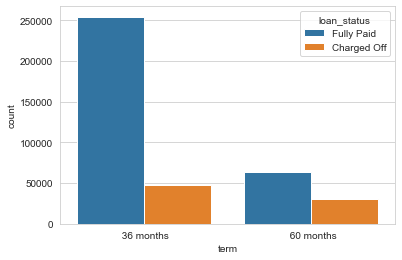

In [242]:
sns.countplot(data = df, x='term',hue='loan_status')

In [311]:
#change the term column to  numerical value
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [312]:
#drop 'grade' column and keep the 'subgrade' which has more granularity
df = df.drop('grade',axis=1)

In [313]:
# change the 'subgrade' categorical value to dummies variables 
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df =df.drop('sub_grade',axis=1)
df = pd.concat([df,dummies],axis=1)

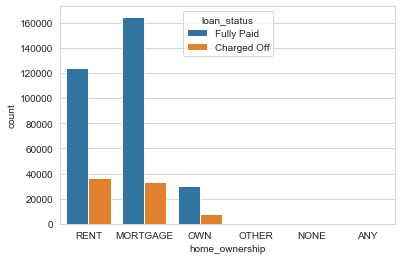

In [249]:
sns.countplot(data=df,x='home_ownership',hue='loan_status')

In [314]:
#pack 'NONE' and 'ANY' in 'OTHER'
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

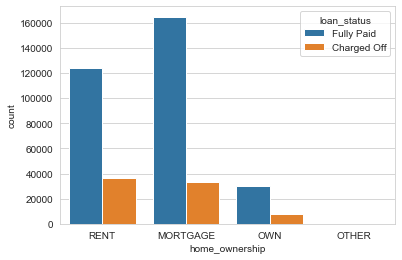

In [254]:
sns.countplot(data=df,x='home_ownership',hue='loan_status')

In [255]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [315]:
# change the 'home_ownership' categorical value to dummies variables 

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df =df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [257]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [316]:
# change the 'verification_status' categorical value to dummies variables 

dummies = pd.get_dummies(df['verification_status'],drop_first=True)
df =df.drop('verification_status',axis=1)
df = pd.concat([df,dummies],axis=1)

In [260]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [317]:
# change the 'initial_list_status' categorical value to dummies variables 

dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
df =df.drop('initial_list_status',axis=1)
df = pd.concat([df,dummies],axis=1)

In [266]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [318]:
# change the 'application_type' categorical value to dummies variables 

dummies = pd.get_dummies(df['application_type'],drop_first=True)
df =df.drop('application_type',axis=1)
df = pd.concat([df,dummies],axis=1)

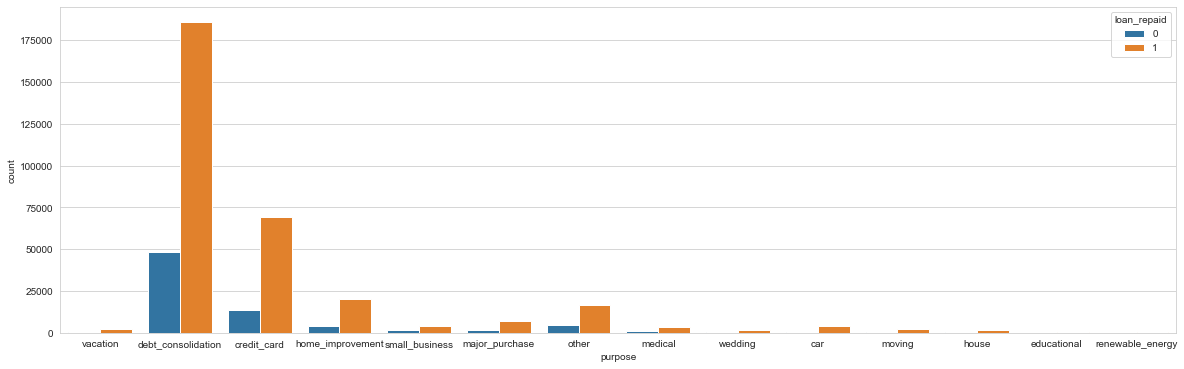

In [268]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='purpose',hue='loan_repaid')

In [319]:
# change the 'purpose' categorical value to dummies variables 

dummies = pd.get_dummies(df['purpose'],drop_first=True)
df =df.drop('purpose',axis=1)
df = pd.concat([df,dummies],axis=1)

In [320]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [321]:
#extracting the zip code from the address
df['zipcode'] = df['address'].apply(lambda address:address[-5:])

In [277]:
#there are 10 unique address
df['zipcode'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zipcode, dtype: int64

In [322]:
#drop the address
df = df.drop('address',axis=1)

In [323]:
# change the 'zipcode' categorical value to dummies variables 

dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df =df.drop('zipcode',axis=1)
df = pd.concat([df,dummies],axis=1)

In [324]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [283]:
feat_info('issue_d')

'The month which the loan was funded'

In [325]:
df['issue_d'] = df['issue_d'].apply(lambda isd:isd[0:3])

In [326]:
df['issue_d'].value_counts()

Oct    42130
Jul    39714
Jan    34682
Nov    34068
Apr    33223
Aug    32816
Mar    31919
May    31895
Jun    30140
Dec    29082
Feb    28742
Sep    27619
Name: issue_d, dtype: int64

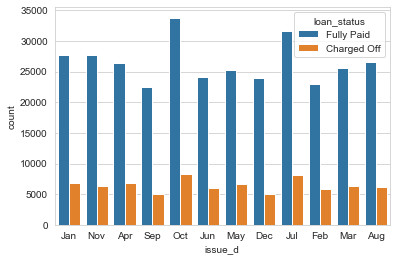

In [293]:
sns.countplot(data=df,x='issue_d',hue='loan_status')

# It seems the month of issuing the loan does not hav ethat much effect on the loan payback 

In [327]:
#drop 'issue_d'
df = df.drop('issue_d',axis=1)

In [328]:
df.select_dtypes('object').columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [329]:
feat_info('earliest_cr_line')

"The month the borrower's earliest reported credit line was opened"

In [331]:
#extract the year of first credit
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda string: int(string[-4:]))

In [333]:
#drop the 'loan_status' because we aready made a '0' or '1' column called 'loan_repaid'
df = df.drop('loan_status',axis=1)

In [337]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN',
       'RENT', 'Source Verified', 'Verified', 'w', 'INDIVIDUAL', 'JOINT',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', '05113',
       '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

# preper train and test data

In [338]:
#seperate features and label data
X= df.drop('loan_repaid',axis=1).values
y= df['loan_repaid'].values

In [363]:
#split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# scaling the data for faster processing

In [364]:
scalar = MinMaxScaler()
#scale the train and test data seperately in order to keep the test data unbiased
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# building the model using tensorflow/keras

In [356]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [421]:
#building a sequential model with 4 hidden layers
model = Sequential()

model.add(Dense(200,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

model.add(Dense(200,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

model.add(Dense(200,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

model.add(Dense(200,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

model.add(Dense(200,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

model.add(Dense(100,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))

model.add(Dense(100,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))


model.add(Dense(40,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))


#output layer (sigmoid)
model.add(Dense(1,activation ='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [392]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),batch_size=256)

Train on 356427 samples, validate on 39603 samples
Epoch 1/250
356427/356427 [==============================] - 63s 176us/sample - loss: 0.3681 - val_loss: 0.2685
Epoch 2/250
356427/356427 [==============================] - 13s 37us/sample - loss: 0.2798 - val_loss: 0.2612
Epoch 3/250
356427/356427 [==============================] - 14s 40us/sample - loss: 0.2723 - val_loss: 0.2610
Epoch 4/250
356427/356427 [==============================] - 14s 41us/sample - loss: 0.2701 - val_loss: 0.2603
Epoch 5/250
356427/356427 [==============================] - 15s 41us/sample - loss: 0.2685 - val_loss: 0.2597
Epoch 6/250
356427/356427 [==============================] - 15s 41us/sample - loss: 0.2675 - val_loss: 0.2596
Epoch 7/250
356427/356427 [==============================] - 15s 42us/sample - loss: 0.2667 - val_loss: 0.2590
Epoch 8/250
356427/356427 [==============================] - 15s 42us/sample - loss: 0.2661 - val_loss: 0.2597
Epoch 9/250
356427/356427 [==============================] -

356427/356427 [==============================] - 16s 46us/sample - loss: 0.2586 - val_loss: 0.2565
Epoch 74/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2588 - val_loss: 0.2566
Epoch 75/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2585 - val_loss: 0.2561
Epoch 76/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2586 - val_loss: 0.2569
Epoch 77/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2584 - val_loss: 0.2561
Epoch 78/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2589 - val_loss: 0.2562
Epoch 79/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2587 - val_loss: 0.2562
Epoch 80/250
356427/356427 [==============================] - 16s 46us/sample - loss: 0.2584 - val_loss: 0.2559
Epoch 81/250
356427/356427 [==============================] - 17s 47us/sample - loss: 0.2584 - val_loss: 0.2563
Epoch

356427/356427 [==============================] - 17s 48us/sample - loss: 0.2566 - val_loss: 0.2556
Epoch 146/250
356427/356427 [==============================] - 18s 50us/sample - loss: 0.2569 - val_loss: 0.2562
Epoch 147/250
356427/356427 [==============================] - 18s 50us/sample - loss: 0.2572 - val_loss: 0.2563
Epoch 148/250
356427/356427 [==============================] - 17s 49us/sample - loss: 0.2571 - val_loss: 0.2558
Epoch 149/250
356427/356427 [==============================] - 17s 49us/sample - loss: 0.2570 - val_loss: 0.2560
Epoch 150/250
356427/356427 [==============================] - 18s 50us/sample - loss: 0.2570 - val_loss: 0.2558
Epoch 151/250
356427/356427 [==============================] - 18s 50us/sample - loss: 0.2571 - val_loss: 0.2558
Epoch 152/250
356427/356427 [==============================] - 18s 50us/sample - loss: 0.2570 - val_loss: 0.2561
Epoch 153/250
356427/356427 [==============================] - 17s 48us/sample - loss: 0.2571 - val_loss: 0.25

356427/356427 [==============================] - 15s 41us/sample - loss: 0.2565 - val_loss: 0.2561
Epoch 227/250
356427/356427 [==============================] - 15s 43us/sample - loss: 0.2563 - val_loss: 0.2559
Epoch 228/250
356427/356427 [==============================] - 21s 59us/sample - loss: 0.2563 - val_loss: 0.2559
Epoch 229/250
356427/356427 [==============================] - 17s 46us/sample - loss: 0.2562 - val_loss: 0.2557
Epoch 230/250
356427/356427 [==============================] - 17s 46us/sample - loss: 0.2562 - val_loss: 0.2564
Epoch 231/250
356427/356427 [==============================] - 18s 52us/sample - loss: 0.2564 - val_loss: 0.2560
Epoch 232/250
356427/356427 [==============================] - 19s 54us/sample - loss: 0.2562 - val_loss: 0.2566
Epoch 233/250
356427/356427 [==============================] - 22s 63us/sample - loss: 0.2563 - val_loss: 0.2559
Epoch 234/250
356427/356427 [==============================] - 24s 68us/sample - loss: 0.2562 - val_loss: 0.25

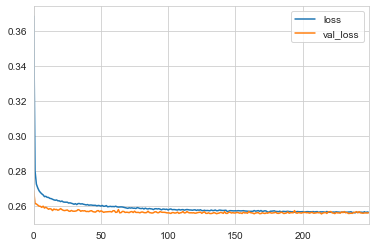

In [393]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

In [394]:
predictions = model.predict_classes(X_test)

print(confusion_matrix(predictions,y_test))
print(classification_report(predictions, y_test))

[[ 3506    71]
 [ 4312 31714]]
              precision    recall  f1-score   support

           0       0.45      0.98      0.62      3577
           1       1.00      0.88      0.94     36026

   micro avg       0.89      0.89      0.89     39603
   macro avg       0.72      0.93      0.78     39603
weighted avg       0.95      0.89      0.91     39603



# Trying the model with balancing the classes labels

In [422]:
df_copy = df[df['loan_repaid']==0]

In [423]:
df_balanced = df

In [424]:
df_balanced = df_balanced.append(df_copy,ignore_index = True)
df_balanced = df_balanced.append(df_copy,ignore_index = True)
df_balanced = df_balanced.append(df_copy,ignore_index = True)
len(df_balanced)

629049

In [425]:
df_balanced['loan_repaid'].value_counts()

1    318357
0    310692
Name: loan_repaid, dtype: int64

In [430]:
#seperate features and label data
X_balanced= df_balanced.drop('loan_repaid',axis=1).values
y_balanced= df_balanced['loan_repaid'].values

#split the data for train and test
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.1, random_state=103)

scalar = MinMaxScaler()
#scale the train and test data seperately in order to keep the test data unbiased
X_train_balanced = scalar.fit_transform(X_train_balanced)
X_test_balanced = scalar.transform(X_test_balanced)

#same model
model.fit(X_train_balanced,y_train_balanced,epochs=3000,validation_data=(X_test_balanced,y_test_balanced),batch_size=4096)

Train on 566144 samples, validate on 62905 samples
Epoch 1/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3279 - val_loss: 0.3247
Epoch 2/3000
566144/566144 [==============================] - 52s 91us/sample - loss: 0.3277 - val_loss: 0.3263
Epoch 3/3000
566144/566144 [==============================] - 46s 82us/sample - loss: 0.3275 - val_loss: 0.3279
Epoch 4/3000
566144/566144 [==============================] - 54s 95us/sample - loss: 0.3280 - val_loss: 0.3260
Epoch 5/3000
566144/566144 [==============================] - 52s 93us/sample - loss: 0.3278 - val_loss: 0.3250
Epoch 6/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3281 - val_loss: 0.3247
Epoch 7/3000
566144/566144 [==============================] - 72s 127us/sample - loss: 0.3280 - val_loss: 0.3273
Epoch 8/3000
566144/566144 [==============================] - 64s 113us/sample - loss: 0.3276 - val_loss: 0.3244
Epoch 9/3000
566144/566144 [=======================

Epoch 73/3000
566144/566144 [==============================] - 56s 100us/sample - loss: 0.3271 - val_loss: 0.3274
Epoch 74/3000
566144/566144 [==============================] - 58s 103us/sample - loss: 0.3274 - val_loss: 0.3253
Epoch 75/3000
566144/566144 [==============================] - 58s 103us/sample - loss: 0.3272 - val_loss: 0.3234
Epoch 76/3000
566144/566144 [==============================] - 58s 103us/sample - loss: 0.3272 - val_loss: 0.3238
Epoch 77/3000
566144/566144 [==============================] - 57s 100us/sample - loss: 0.3271 - val_loss: 0.3242
Epoch 78/3000
566144/566144 [==============================] - 56s 99us/sample - loss: 0.3274 - val_loss: 0.3284
Epoch 79/3000
566144/566144 [==============================] - 58s 102us/sample - loss: 0.3268 - val_loss: 0.3273
Epoch 80/3000
566144/566144 [==============================] - 58s 102us/sample - loss: 0.3269 - val_loss: 0.3272
Epoch 81/3000
566144/566144 [==============================] - 57s 100us/sample - loss: 0

566144/566144 [==============================] - 53s 93us/sample - loss: 0.3262 - val_loss: 0.3231
Epoch 146/3000
566144/566144 [==============================] - 54s 95us/sample - loss: 0.3267 - val_loss: 0.3254
Epoch 147/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3261 - val_loss: 0.3224
Epoch 148/3000
566144/566144 [==============================] - 54s 96us/sample - loss: 0.3262 - val_loss: 0.3270
Epoch 149/3000
566144/566144 [==============================] - 51s 91us/sample - loss: 0.3268 - val_loss: 0.3229
Epoch 150/3000
566144/566144 [==============================] - 55s 96us/sample - loss: 0.3265 - val_loss: 0.3221
Epoch 151/3000
566144/566144 [==============================] - 51s 90us/sample - loss: 0.3263 - val_loss: 0.3259
Epoch 152/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3268 - val_loss: 0.3227
Epoch 153/3000
566144/566144 [==============================] - 53s 94us/sample - loss: 0.3264 - val_lo

Epoch 217/3000
566144/566144 [==============================] - 50s 88us/sample - loss: 0.3255 - val_loss: 0.3226
Epoch 218/3000
566144/566144 [==============================] - 52s 93us/sample - loss: 0.3256 - val_loss: 0.3220
Epoch 219/3000
566144/566144 [==============================] - 50s 88us/sample - loss: 0.3259 - val_loss: 0.3220
Epoch 220/3000
566144/566144 [==============================] - 49s 87us/sample - loss: 0.3263 - val_loss: 0.3221
Epoch 221/3000
566144/566144 [==============================] - 53s 93us/sample - loss: 0.3258 - val_loss: 0.3239
Epoch 222/3000
566144/566144 [==============================] - 50s 89us/sample - loss: 0.3263 - val_loss: 0.3231
Epoch 223/3000
566144/566144 [==============================] - 50s 88us/sample - loss: 0.3257 - val_loss: 0.3240
Epoch 224/3000
566144/566144 [==============================] - 51s 91us/sample - loss: 0.3260 - val_loss: 0.3262
Epoch 225/3000
566144/566144 [==============================] - 50s 89us/sample - loss: 

Epoch 289/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3253 - val_loss: 0.3220
Epoch 290/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3255 - val_loss: 0.3236
Epoch 291/3000
566144/566144 [==============================] - 43s 77us/sample - loss: 0.3251 - val_loss: 0.3233
Epoch 292/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3251 - val_loss: 0.3210
Epoch 293/3000
566144/566144 [==============================] - 42s 73us/sample - loss: 0.3254 - val_loss: 0.3250
Epoch 294/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3251 - val_loss: 0.3240
Epoch 295/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3254 - val_loss: 0.3220
Epoch 296/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3250 - val_loss: 0.3224
Epoch 297/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 

Epoch 361/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3249 - val_loss: 0.3203
Epoch 362/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3245 - val_loss: 0.3221
Epoch 363/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3249 - val_loss: 0.3253
Epoch 364/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3248 - val_loss: 0.3219
Epoch 365/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3249 - val_loss: 0.3230
Epoch 366/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3251 - val_loss: 0.3229
Epoch 367/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3249 - val_loss: 0.3218
Epoch 368/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3245 - val_loss: 0.3233
Epoch 369/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 

Epoch 433/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3241 - val_loss: 0.3221
Epoch 434/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3244 - val_loss: 0.3222
Epoch 435/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3243 - val_loss: 0.3216
Epoch 436/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3246 - val_loss: 0.3220
Epoch 437/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3244 - val_loss: 0.3228
Epoch 438/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3242 - val_loss: 0.3232
Epoch 439/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3243 - val_loss: 0.3212
Epoch 440/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3243 - val_loss: 0.3251
Epoch 441/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 

Epoch 505/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3238 - val_loss: 0.3229
Epoch 506/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3241 - val_loss: 0.3210
Epoch 507/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3242 - val_loss: 0.3215
Epoch 508/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3239 - val_loss: 0.3209
Epoch 509/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3241 - val_loss: 0.3225
Epoch 510/3000
566144/566144 [==============================] - 43s 77us/sample - loss: 0.3236 - val_loss: 0.3229
Epoch 511/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3240 - val_loss: 0.3221
Epoch 512/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3240 - val_loss: 0.3202
Epoch 513/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 

Epoch 577/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3234 - val_loss: 0.3228
Epoch 578/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3235 - val_loss: 0.3243
Epoch 579/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3238 - val_loss: 0.3215
Epoch 580/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3237 - val_loss: 0.3201
Epoch 581/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3238 - val_loss: 0.3219
Epoch 582/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3234 - val_loss: 0.3193
Epoch 583/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3233 - val_loss: 0.3225
Epoch 584/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3237 - val_loss: 0.3220
Epoch 585/3000
566144/566144 [==============================] - 46s 80us/sample - loss: 

Epoch 649/3000
566144/566144 [==============================] - 47s 84us/sample - loss: 0.3236 - val_loss: 0.3224
Epoch 650/3000
566144/566144 [==============================] - 47s 82us/sample - loss: 0.3233 - val_loss: 0.3260
Epoch 651/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3233 - val_loss: 0.3229
Epoch 652/3000
566144/566144 [==============================] - 49s 87us/sample - loss: 0.3231 - val_loss: 0.3204
Epoch 653/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3238 - val_loss: 0.3191
Epoch 654/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3232 - val_loss: 0.3231
Epoch 655/3000
566144/566144 [==============================] - 48s 84us/sample - loss: 0.3230 - val_loss: 0.3183
Epoch 656/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3234 - val_loss: 0.3228
Epoch 657/3000
566144/566144 [==============================] - 49s 86us/sample - loss: 

Epoch 721/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3230 - val_loss: 0.3196
Epoch 722/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3229 - val_loss: 0.3202
Epoch 723/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3231 - val_loss: 0.3222
Epoch 724/3000
566144/566144 [==============================] - 46s 82us/sample - loss: 0.3234 - val_loss: 0.3210
Epoch 725/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3232 - val_loss: 0.3206
Epoch 726/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3227 - val_loss: 0.3218
Epoch 727/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3225 - val_loss: 0.3212
Epoch 728/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3231 - val_loss: 0.3213
Epoch 729/3000
566144/566144 [==============================] - 46s 82us/sample - loss: 

Epoch 793/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3229 - val_loss: 0.3199
Epoch 794/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3231 - val_loss: 0.3218
Epoch 795/3000
566144/566144 [==============================] - 42s 73us/sample - loss: 0.3223 - val_loss: 0.3203
Epoch 796/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3227 - val_loss: 0.3221
Epoch 797/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3226 - val_loss: 0.3182
Epoch 798/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3226 - val_loss: 0.3208
Epoch 799/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3227 - val_loss: 0.3229
Epoch 800/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3224 - val_loss: 0.3190
Epoch 801/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 

Epoch 865/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3226 - val_loss: 0.3228
Epoch 866/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3221 - val_loss: 0.3190
Epoch 867/3000
566144/566144 [==============================] - 49s 87us/sample - loss: 0.3224 - val_loss: 0.3197
Epoch 868/3000
566144/566144 [==============================] - 54s 95us/sample - loss: 0.3223 - val_loss: 0.3210
Epoch 869/3000
566144/566144 [==============================] - 50s 87us/sample - loss: 0.3220 - val_loss: 0.3228
Epoch 870/3000
566144/566144 [==============================] - 47s 82us/sample - loss: 0.3224 - val_loss: 0.3178
Epoch 871/3000
566144/566144 [==============================] - 55s 97us/sample - loss: 0.3224 - val_loss: 0.3184
Epoch 872/3000
566144/566144 [==============================] - 48s 86us/sample - loss: 0.3228 - val_loss: 0.3207
Epoch 873/3000
566144/566144 [==============================] - 48s 84us/sample - loss: 

Epoch 937/3000
566144/566144 [==============================] - 51s 89us/sample - loss: 0.3218 - val_loss: 0.3251
Epoch 938/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3228 - val_loss: 0.3188
Epoch 939/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3221 - val_loss: 0.3203
Epoch 940/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3222 - val_loss: 0.3208
Epoch 941/3000
566144/566144 [==============================] - 39s 68us/sample - loss: 0.3220 - val_loss: 0.3175
Epoch 942/3000
566144/566144 [==============================] - 39s 68us/sample - loss: 0.3223 - val_loss: 0.3187
Epoch 943/3000
566144/566144 [==============================] - 38s 68us/sample - loss: 0.3219 - val_loss: 0.3224
Epoch 944/3000
566144/566144 [==============================] - 38s 67us/sample - loss: 0.3216 - val_loss: 0.3215
Epoch 945/3000
566144/566144 [==============================] - 38s 67us/sample - loss: 

Epoch 1009/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3220 - val_loss: 0.3183
Epoch 1010/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3216 - val_loss: 0.3193
Epoch 1011/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3223 - val_loss: 0.3198
Epoch 1012/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3217 - val_loss: 0.3214
Epoch 1013/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3219 - val_loss: 0.3158
Epoch 1014/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3221 - val_loss: 0.3190
Epoch 1015/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3215 - val_loss: 0.3209
Epoch 1016/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3219 - val_loss: 0.3189
Epoch 1017/3000
566144/566144 [==============================] - 39s 69us/sample

566144/566144 [==============================] - 43s 77us/sample - loss: 0.3220 - val_loss: 0.3187
Epoch 1081/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3217 - val_loss: 0.3194
Epoch 1082/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3223 - val_loss: 0.3224
Epoch 1083/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3220 - val_loss: 0.3165
Epoch 1084/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3219 - val_loss: 0.3228
Epoch 1085/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3217 - val_loss: 0.3200
Epoch 1086/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3216 - val_loss: 0.3225
Epoch 1087/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3217 - val_loss: 0.3190
Epoch 1088/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3219 

566144/566144 [==============================] - 41s 72us/sample - loss: 0.3217 - val_loss: 0.3210
Epoch 1152/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3216 - val_loss: 0.3190
Epoch 1153/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3209 - val_loss: 0.3200
Epoch 1154/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3210 - val_loss: 0.3193
Epoch 1155/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3215 - val_loss: 0.3204
Epoch 1156/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3216 - val_loss: 0.3180
Epoch 1157/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3211 - val_loss: 0.3168
Epoch 1158/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3215 - val_loss: 0.3195
Epoch 1159/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3216 

566144/566144 [==============================] - 42s 74us/sample - loss: 0.3207 - val_loss: 0.3205
Epoch 1223/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3215 - val_loss: 0.3203
Epoch 1224/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3216 - val_loss: 0.3181
Epoch 1225/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3214 - val_loss: 0.3256
Epoch 1226/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3210 - val_loss: 0.3203
Epoch 1227/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3208 - val_loss: 0.3206
Epoch 1228/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3215 - val_loss: 0.3209
Epoch 1229/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3213 - val_loss: 0.3194
Epoch 1230/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3210 

566144/566144 [==============================] - 42s 74us/sample - loss: 0.3210 - val_loss: 0.3190
Epoch 1294/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3211 - val_loss: 0.3177
Epoch 1295/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3211 - val_loss: 0.3170
Epoch 1296/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3210 - val_loss: 0.3169
Epoch 1297/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3211 - val_loss: 0.3164
Epoch 1298/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3211 - val_loss: 0.3206
Epoch 1299/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3212 - val_loss: 0.3177
Epoch 1300/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3212 - val_loss: 0.3174
Epoch 1301/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3207 

566144/566144 [==============================] - 39s 69us/sample - loss: 0.3209 - val_loss: 0.3209
Epoch 1365/3000
566144/566144 [==============================] - 39s 68us/sample - loss: 0.3211 - val_loss: 0.3166
Epoch 1366/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3208 - val_loss: 0.3177
Epoch 1367/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3209 - val_loss: 0.3206
Epoch 1368/3000
566144/566144 [==============================] - 39s 68us/sample - loss: 0.3206 - val_loss: 0.3197
Epoch 1369/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3206 - val_loss: 0.3175
Epoch 1370/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3212 - val_loss: 0.3193
Epoch 1371/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3209 - val_loss: 0.3196
Epoch 1372/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3211 

566144/566144 [==============================] - 40s 71us/sample - loss: 0.3205 - val_loss: 0.3171
Epoch 1436/3000
566144/566144 [==============================] - 39s 70us/sample - loss: 0.3210 - val_loss: 0.3178
Epoch 1437/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3210 - val_loss: 0.3184
Epoch 1438/3000
566144/566144 [==============================] - 39s 70us/sample - loss: 0.3205 - val_loss: 0.3192
Epoch 1439/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3205 - val_loss: 0.3194
Epoch 1440/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3205 - val_loss: 0.3178
Epoch 1441/3000
566144/566144 [==============================] - 38s 67us/sample - loss: 0.3209 - val_loss: 0.3214
Epoch 1442/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3208 - val_loss: 0.3177
Epoch 1443/3000
566144/566144 [==============================] - 38s 68us/sample - loss: 0.3203 

566144/566144 [==============================] - 48s 84us/sample - loss: 0.3208 - val_loss: 0.3198
Epoch 1507/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3201 - val_loss: 0.3150
Epoch 1508/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3204 - val_loss: 0.3205
Epoch 1509/3000
566144/566144 [==============================] - 50s 89us/sample - loss: 0.3210 - val_loss: 0.3171
Epoch 1510/3000
566144/566144 [==============================] - 55s 97us/sample - loss: 0.3205 - val_loss: 0.3176
Epoch 1511/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3208 - val_loss: 0.3182
Epoch 1512/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3207 - val_loss: 0.3152
Epoch 1513/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3203 - val_loss: 0.3183
Epoch 1514/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3205 

566144/566144 [==============================] - 40s 70us/sample - loss: 0.3203 - val_loss: 0.3180
Epoch 1578/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3208 - val_loss: 0.3165
Epoch 1579/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3201 - val_loss: 0.3191
Epoch 1580/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3203 - val_loss: 0.3219
Epoch 1581/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3205 - val_loss: 0.3209
Epoch 1582/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3198 - val_loss: 0.3153
Epoch 1583/3000
566144/566144 [==============================] - 39s 70us/sample - loss: 0.3204 - val_loss: 0.3184
Epoch 1584/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3205 - val_loss: 0.3174
Epoch 1585/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3204 

566144/566144 [==============================] - 39s 68us/sample - loss: 0.3204 - val_loss: 0.3161
Epoch 1649/3000
566144/566144 [==============================] - 38s 68us/sample - loss: 0.3207 - val_loss: 0.3176
Epoch 1650/3000
566144/566144 [==============================] - 39s 70us/sample - loss: 0.3200 - val_loss: 0.3169
Epoch 1651/3000
566144/566144 [==============================] - 48s 84us/sample - loss: 0.3204 - val_loss: 0.3182
Epoch 1652/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3206 - val_loss: 0.3174
Epoch 1653/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3201 - val_loss: 0.3174
Epoch 1654/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3203 - val_loss: 0.3204
Epoch 1655/3000
566144/566144 [==============================] - 46s 80us/sample - loss: 0.3203 - val_loss: 0.3217
Epoch 1656/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3204 

566144/566144 [==============================] - 43s 76us/sample - loss: 0.3208 - val_loss: 0.3166
Epoch 1720/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3205 - val_loss: 0.3173
Epoch 1721/3000
566144/566144 [==============================] - 47s 82us/sample - loss: 0.3202 - val_loss: 0.3204
Epoch 1722/3000
566144/566144 [==============================] - 46s 82us/sample - loss: 0.3204 - val_loss: 0.3172
Epoch 1723/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3196 - val_loss: 0.3184
Epoch 1724/3000
566144/566144 [==============================] - 49s 87us/sample - loss: 0.3200 - val_loss: 0.3185
Epoch 1725/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3201 - val_loss: 0.3152
Epoch 1726/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3199 - val_loss: 0.3180
Epoch 1727/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3200 

566144/566144 [==============================] - 43s 75us/sample - loss: 0.3193 - val_loss: 0.3165
Epoch 1791/3000
566144/566144 [==============================] - 48s 84us/sample - loss: 0.3201 - val_loss: 0.3179
Epoch 1792/3000
566144/566144 [==============================] - 51s 90us/sample - loss: 0.3200 - val_loss: 0.3182
Epoch 1793/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3199 - val_loss: 0.3158
Epoch 1794/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3198 - val_loss: 0.3170
Epoch 1795/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3201 - val_loss: 0.3191
Epoch 1796/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3204 - val_loss: 0.3179
Epoch 1797/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3199 - val_loss: 0.3174
Epoch 1798/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3200 

566144/566144 [==============================] - 53s 94us/sample - loss: 0.3197 - val_loss: 0.3152
Epoch 1862/3000
566144/566144 [==============================] - 56s 99us/sample - loss: 0.3201 - val_loss: 0.3192
Epoch 1863/3000
566144/566144 [==============================] - 56s 99us/sample - loss: 0.3204 - val_loss: 0.3158
Epoch 1864/3000
566144/566144 [==============================] - 57s 101us/sample - loss: 0.3199 - val_loss: 0.3165
Epoch 1865/3000
566144/566144 [==============================] - 52s 91us/sample - loss: 0.3194 - val_loss: 0.3219
Epoch 1866/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3200 - val_loss: 0.3162
Epoch 1867/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3201 - val_loss: 0.3175
Epoch 1868/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3198 - val_loss: 0.3160
Epoch 1869/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3198

Epoch 1932/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3196 - val_loss: 0.3163
Epoch 1933/3000
566144/566144 [==============================] - 48s 86us/sample - loss: 0.3194 - val_loss: 0.3203
Epoch 1934/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3194 - val_loss: 0.3157
Epoch 1935/3000
566144/566144 [==============================] - 52s 91us/sample - loss: 0.3200 - val_loss: 0.3163
Epoch 1936/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3199 - val_loss: 0.3155
Epoch 1937/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3198 - val_loss: 0.3162
Epoch 1938/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3192 - val_loss: 0.3150
Epoch 1939/3000
566144/566144 [==============================] - 50s 88us/sample - loss: 0.3197 - val_loss: 0.3227
Epoch 1940/3000
566144/566144 [==============================] - 54s 96us/sample

566144/566144 [==============================] - 44s 77us/sample - loss: 0.3196 - val_loss: 0.3173
Epoch 2004/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3199 - val_loss: 0.3150
Epoch 2005/3000
566144/566144 [==============================] - 43s 77us/sample - loss: 0.3199 - val_loss: 0.3140
Epoch 2006/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3193 - val_loss: 0.3174
Epoch 2007/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3196 - val_loss: 0.3173
Epoch 2008/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3199 - val_loss: 0.3153
Epoch 2009/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3196 - val_loss: 0.3180
Epoch 2010/3000
566144/566144 [==============================] - 45s 80us/sample - loss: 0.3194 - val_loss: 0.3185
Epoch 2011/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3194 

566144/566144 [==============================] - 42s 75us/sample - loss: 0.3193 - val_loss: 0.3186
Epoch 2075/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3194 - val_loss: 0.3168
Epoch 2076/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3193 - val_loss: 0.3164
Epoch 2077/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3193 - val_loss: 0.3201
Epoch 2078/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3192 - val_loss: 0.3179
Epoch 2079/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3196 - val_loss: 0.3177
Epoch 2080/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3191 - val_loss: 0.3210
Epoch 2081/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3193 - val_loss: 0.3220
Epoch 2082/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3193 

566144/566144 [==============================] - 43s 76us/sample - loss: 0.3193 - val_loss: 0.3157
Epoch 2146/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3194 - val_loss: 0.3184
Epoch 2147/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3196 - val_loss: 0.3179
Epoch 2148/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3192 - val_loss: 0.3173
Epoch 2149/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3201 - val_loss: 0.3190
Epoch 2150/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3195 - val_loss: 0.3226
Epoch 2151/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3190 - val_loss: 0.3167
Epoch 2152/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3192 - val_loss: 0.3183
Epoch 2153/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3193 

566144/566144 [==============================] - 42s 74us/sample - loss: 0.3199 - val_loss: 0.3167
Epoch 2217/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3195 - val_loss: 0.3195
Epoch 2218/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3195 - val_loss: 0.3185
Epoch 2219/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3193 - val_loss: 0.3192
Epoch 2220/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3191 - val_loss: 0.3153
Epoch 2221/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3191 - val_loss: 0.3190
Epoch 2222/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3194 - val_loss: 0.3185
Epoch 2223/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3194 - val_loss: 0.3158
Epoch 2224/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3189 

566144/566144 [==============================] - 43s 75us/sample - loss: 0.3193 - val_loss: 0.3169
Epoch 2288/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3193 - val_loss: 0.3145
Epoch 2289/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3194 - val_loss: 0.3167
Epoch 2290/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3190 - val_loss: 0.3171
Epoch 2291/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3194 - val_loss: 0.3176
Epoch 2292/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3190 - val_loss: 0.3211
Epoch 2293/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3186 - val_loss: 0.3192
Epoch 2294/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3194 - val_loss: 0.3167
Epoch 2295/3000
566144/566144 [==============================] - 46s 81us/sample - loss: 0.3193 

566144/566144 [==============================] - 42s 74us/sample - loss: 0.3189 - val_loss: 0.3181
Epoch 2359/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3188 - val_loss: 0.3179
Epoch 2360/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3192 - val_loss: 0.3172
Epoch 2361/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3191 - val_loss: 0.3192
Epoch 2362/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3191 - val_loss: 0.3184
Epoch 2363/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3188 - val_loss: 0.3155
Epoch 2364/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3189 - val_loss: 0.3169
Epoch 2365/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3192 - val_loss: 0.3188
Epoch 2366/3000
566144/566144 [==============================] - 43s 77us/sample - loss: 0.3187 

566144/566144 [==============================] - 40s 71us/sample - loss: 0.3187 - val_loss: 0.3163
Epoch 2430/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3184 - val_loss: 0.3150
Epoch 2431/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3189 - val_loss: 0.3190
Epoch 2432/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3188 - val_loss: 0.3160
Epoch 2433/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3190 - val_loss: 0.3155
Epoch 2434/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3185 - val_loss: 0.3183
Epoch 2435/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3189 - val_loss: 0.3152
Epoch 2436/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3189 - val_loss: 0.3161
Epoch 2437/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3190 

566144/566144 [==============================] - 40s 70us/sample - loss: 0.3185 - val_loss: 0.3169
Epoch 2501/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3188 - val_loss: 0.3161
Epoch 2502/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3184 - val_loss: 0.3185
Epoch 2503/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3185 - val_loss: 0.3183
Epoch 2504/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3189 - val_loss: 0.3181
Epoch 2505/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3195 - val_loss: 0.3163
Epoch 2506/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3189 - val_loss: 0.3160
Epoch 2507/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3190 - val_loss: 0.3146
Epoch 2508/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3190 

566144/566144 [==============================] - 41s 72us/sample - loss: 0.3187 - val_loss: 0.3147
Epoch 2572/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3189 - val_loss: 0.3183
Epoch 2573/3000
566144/566144 [==============================] - 40s 70us/sample - loss: 0.3187 - val_loss: 0.3196
Epoch 2574/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3186 - val_loss: 0.3155
Epoch 2575/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3182 - val_loss: 0.3171
Epoch 2576/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3187 - val_loss: 0.3183
Epoch 2577/3000
566144/566144 [==============================] - 41s 72us/sample - loss: 0.3184 - val_loss: 0.3172
Epoch 2578/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3185 - val_loss: 0.3134
Epoch 2579/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3190 

566144/566144 [==============================] - 44s 77us/sample - loss: 0.3190 - val_loss: 0.3171
Epoch 2643/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3189 - val_loss: 0.3161
Epoch 2644/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3186 - val_loss: 0.3187
Epoch 2645/3000
566144/566144 [==============================] - 43s 75us/sample - loss: 0.3188 - val_loss: 0.3146
Epoch 2646/3000
566144/566144 [==============================] - 40s 71us/sample - loss: 0.3183 - val_loss: 0.3163
Epoch 2647/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3187 - val_loss: 0.3165
Epoch 2648/3000
566144/566144 [==============================] - 41s 73us/sample - loss: 0.3183 - val_loss: 0.3234
Epoch 2649/3000
566144/566144 [==============================] - 43s 76us/sample - loss: 0.3185 - val_loss: 0.3156
Epoch 2650/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3184 

566144/566144 [==============================] - 52s 91us/sample - loss: 0.3184 - val_loss: 0.3228
Epoch 2714/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3188 - val_loss: 0.3172
Epoch 2715/3000
566144/566144 [==============================] - 52s 91us/sample - loss: 0.3185 - val_loss: 0.3152
Epoch 2716/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3185 - val_loss: 0.3179
Epoch 2717/3000
566144/566144 [==============================] - 52s 92us/sample - loss: 0.3182 - val_loss: 0.3128
Epoch 2718/3000
566144/566144 [==============================] - 51s 90us/sample - loss: 0.3184 - val_loss: 0.3172
Epoch 2719/3000
566144/566144 [==============================] - 52s 91us/sample - loss: 0.3186 - val_loss: 0.3174
Epoch 2720/3000
566144/566144 [==============================] - 52s 91us/sample - loss: 0.3185 - val_loss: 0.3189
Epoch 2721/3000
566144/566144 [==============================] - 51s 90us/sample - loss: 0.3179 

566144/566144 [==============================] - 50s 88us/sample - loss: 0.3189 - val_loss: 0.3155
Epoch 2785/3000
566144/566144 [==============================] - 53s 93us/sample - loss: 0.3186 - val_loss: 0.3163
Epoch 2786/3000
566144/566144 [==============================] - 60s 106us/sample - loss: 0.3187 - val_loss: 0.3161
Epoch 2787/3000
566144/566144 [==============================] - 48s 85us/sample - loss: 0.3185 - val_loss: 0.3161
Epoch 2788/3000
566144/566144 [==============================] - 45s 79us/sample - loss: 0.3182 - val_loss: 0.3154
Epoch 2789/3000
566144/566144 [==============================] - 46s 82us/sample - loss: 0.3183 - val_loss: 0.3151
Epoch 2790/3000
566144/566144 [==============================] - 47s 82us/sample - loss: 0.3181 - val_loss: 0.3157
Epoch 2791/3000
566144/566144 [==============================] - 49s 86us/sample - loss: 0.3187 - val_loss: 0.3179
Epoch 2792/3000
566144/566144 [==============================] - 62s 110us/sample - loss: 0.318

566144/566144 [==============================] - 43s 75us/sample - loss: 0.3182 - val_loss: 0.3173
Epoch 2856/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3183 - val_loss: 0.3148
Epoch 2857/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3183 - val_loss: 0.3154
Epoch 2858/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3181 - val_loss: 0.3176
Epoch 2859/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3184 - val_loss: 0.3153
Epoch 2860/3000
566144/566144 [==============================] - 42s 75us/sample - loss: 0.3181 - val_loss: 0.3146
Epoch 2861/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3186 - val_loss: 0.3164
Epoch 2862/3000
566144/566144 [==============================] - 42s 74us/sample - loss: 0.3184 - val_loss: 0.3161
Epoch 2863/3000
566144/566144 [==============================] - 43s 77us/sample - loss: 0.3181 

566144/566144 [==============================] - 45s 80us/sample - loss: 0.3185 - val_loss: 0.3150
Epoch 2927/3000
566144/566144 [==============================] - 44s 78us/sample - loss: 0.3183 - val_loss: 0.3181
Epoch 2928/3000
566144/566144 [==============================] - 44s 77us/sample - loss: 0.3185 - val_loss: 0.3178
Epoch 2929/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3185 - val_loss: 0.3152
Epoch 2930/3000
566144/566144 [==============================] - 47s 83us/sample - loss: 0.3183 - val_loss: 0.3164
Epoch 2931/3000
566144/566144 [==============================] - 47s 84us/sample - loss: 0.3178 - val_loss: 0.3141
Epoch 2932/3000
566144/566144 [==============================] - 47s 82us/sample - loss: 0.3180 - val_loss: 0.3154
Epoch 2933/3000
566144/566144 [==============================] - 46s 82us/sample - loss: 0.3183 - val_loss: 0.3161
Epoch 2934/3000
566144/566144 [==============================] - 48s 84us/sample - loss: 0.3185 

566144/566144 [==============================] - 39s 69us/sample - loss: 0.3182 - val_loss: 0.3168
Epoch 2998/3000
566144/566144 [==============================] - 38s 68us/sample - loss: 0.3181 - val_loss: 0.3172
Epoch 2999/3000
566144/566144 [==============================] - 38s 67us/sample - loss: 0.3182 - val_loss: 0.3184
Epoch 3000/3000
566144/566144 [==============================] - 39s 69us/sample - loss: 0.3176 - val_loss: 0.3180


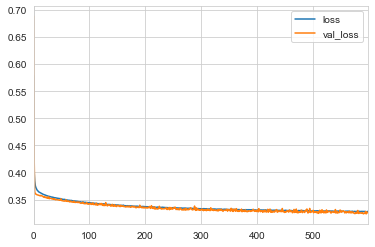

In [428]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

In [429]:
predictions_balanced = model.predict_classes(X_test_balanced)

print(confusion_matrix(predictions_balanced,y_test_balanced))
print(classification_report(predictions_balanced, y_test_balanced))

[[25091  5050]
 [ 5995 26769]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     30141
           1       0.84      0.82      0.83     32764

   micro avg       0.82      0.82      0.82     62905
   macro avg       0.82      0.82      0.82     62905
weighted avg       0.82      0.82      0.82     62905

